PyTorch Workflow

Exploring end-to-end PyTorch workflow

resource: https://www.learnpytorch.io/01_pytorch_workflow/

In [2]:
what_I_will_cover = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_I_will_cover

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks (computational graphs)
import matplotlib.pyplot as plt

# Data (preparing and loading)

we will use linear regression to form a straight line with know parameters

In [4]:
# Create know parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02


# Capital letters (variables) indicates matrix or tensor while lower case indicates vectors
X = torch.arange(start=start,end=end,step=step).unsqueeze(dim=1)

# Formula for linear regression is :- y = mx + b. In this equation, y is the dependent variable that you want to predict, X is the independent variable used for prediction, m is the slope of the line, and b is the y-intercept.
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
#Splitting data into training and test sets
train_split_x = int(0.8 * len(X))
train_split_y = int(0.8 * len(y))

# ':' at the start means get all data from 0 index till the number provided and after means get the data after the number provided
X_train, X_test  = X[:train_split_x], X[train_split_x:]
y_train, y_test = y[:train_split_y], y[train_split_y:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions (
        train_data,
        train_labels,
        test_data,
        test_labels,
        predictions = None
    ):
    
    """
    Plot training data , test data and compares predictions
    """
    plt.figure(figsize=(10,7))

    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training Data")    

    #plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Test Data")

    if predictions is not None:
        #plot the predictions if available
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    plt.legend(prop = {"size" : 14})
    plt.show() 

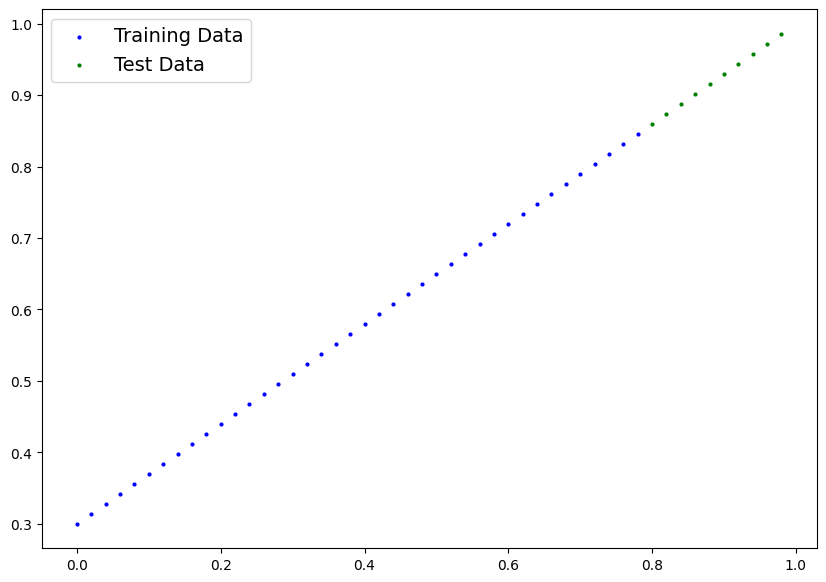

In [7]:
plot_predictions(X_train,y_train,X_test,y_test)

# **BUILD MODEL**

what our model does?
- starts with random values (weight and bias).
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (know weight & bias we used to for the graph representation).


how does it do so?
- through 2 main algorithms:
    1. gradient descent
    2. Backpropagation


In [8]:
#Create linear regression model class
class LinearRegression(nn.Module): #<- almost everything in PyTorch inherits nn.Module
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    
    #Forward method to define the computation in the model (every subclass from nn.Module needs to overide forward function)
    def forward (self, x:torch.Tensor) -> torch.Tensor: 
        return self.weights*x + self.bias #linear regression formula
    

## **PYTORCH MODEL BUILDING ESSENTIALS**

* torch.nn - contains all of the buildings for computational graphs (another word for neural networks).
* torch.nn.Parameter - what parameters should our model try and learn - often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you make a subclass from this you should override forward method
* torch.optim - this is where optimizers in PyTorch lives, they will help with gradiant descent

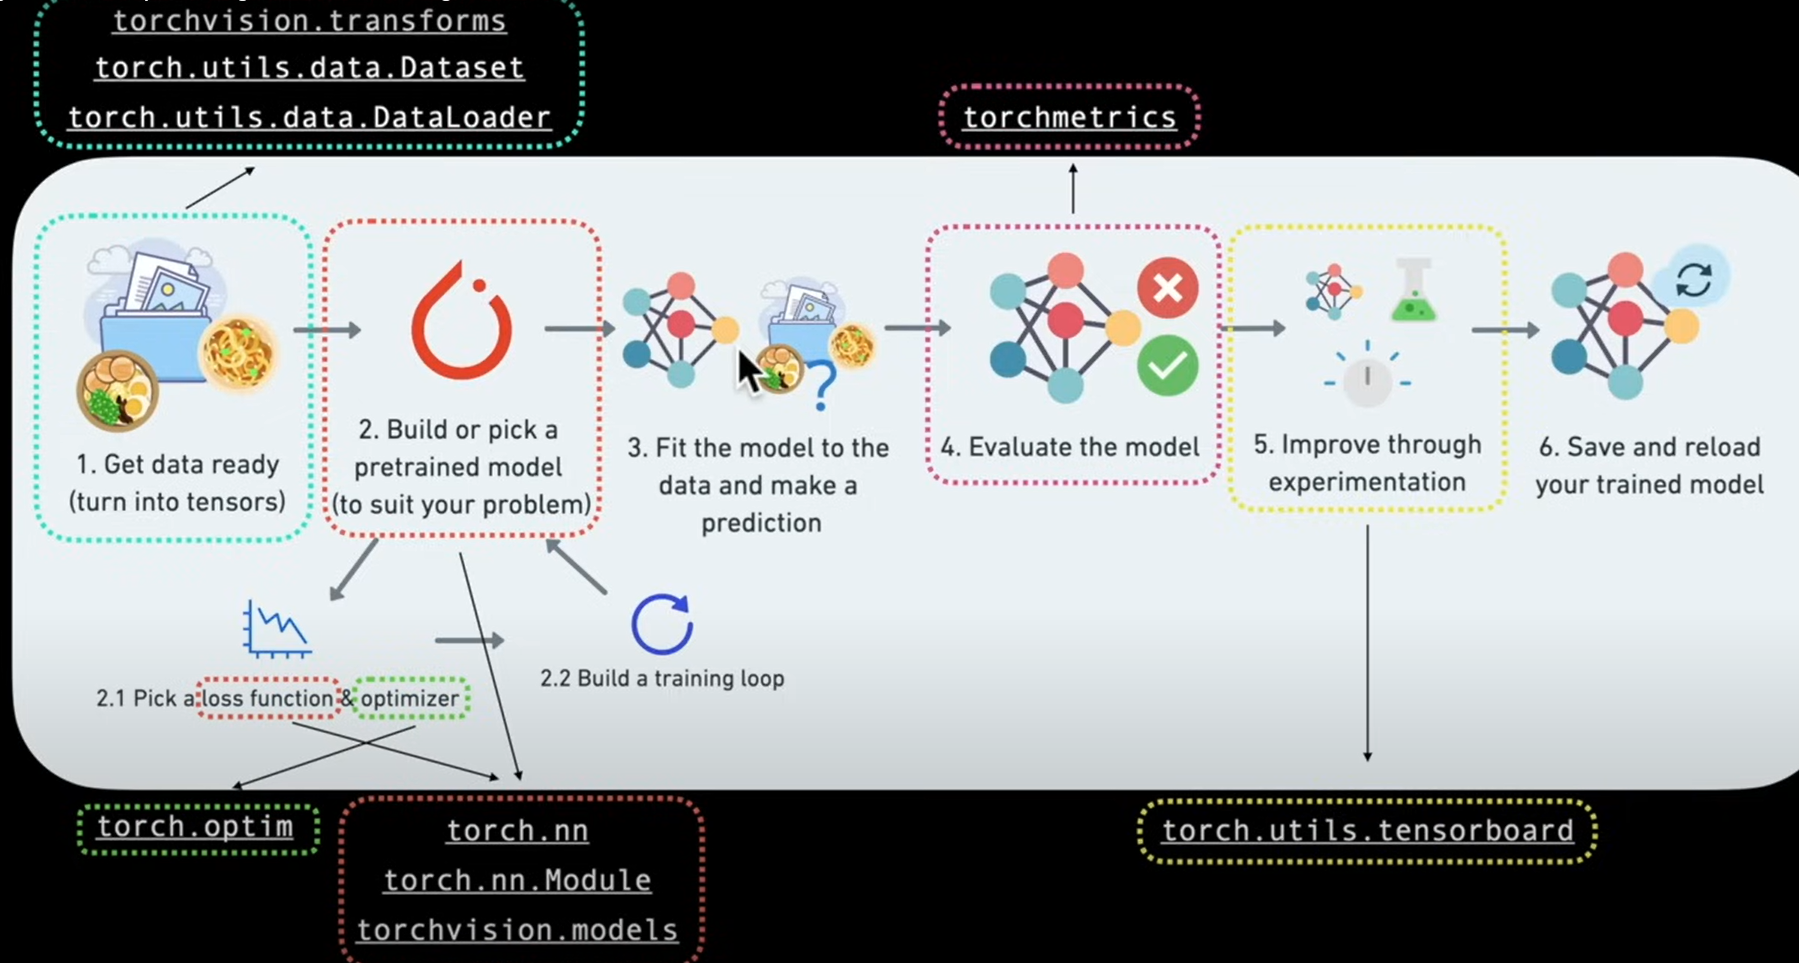

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of our model
model_0 = LinearRegression()

# Print dictionary of our models
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making predictions using `torch.inference_mode()`

In [10]:
# Making predictions with our model
with torch.inference_mode(): #turns off gradients
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

## **Training your model need**
* MAE (MEAN ABSOLUTE ERROR) that tells you how wrong is your model's preduction to the ideal outputs, lower is better. In PyTorch there is a built function called **Loss Function** to calculate MAE.
* Optimizer: takes into account the loss of a model and adjusts the model parameters to improve the loss function 

In [12]:
# Setting up a loss function
loss_fn = nn.L1Loss() #MAE
loss_fn



# Setting up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #SGD = Stochastic Gradient Descent, lr = learning rate defines how big of a step the optimizer should take to reach the minimum of the loss function
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)